In [1]:
%%time
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib. pyplot as plt
from scipy.stats import anderson
from scipy.stats import zscore
from scipy.signal import butter, filtfilt

CPU times: total: 1.02 s
Wall time: 1.08 s


In [2]:
# Cargar los datos desde el archivo Excel
df = pd.read_excel('Dataset.xlsx', header=0)

columna_seleccionada = "BPM"

# Extraer los datos de la columna seleccionada
datos = df[columna_seleccionada]

# Realizar la prueba de normalidad de Anderson-Darling
resultado_anderson = anderson(datos)

# Obtener las métricas de interés
estadistico_anderson = resultado_anderson.statistic
p_valor = resultado_anderson.critical_values[2]  # Usamos el valor crítico asociado al 5% de nivel de significancia
media = np.mean(datos)
desviacion_estandar = np.std(datos)

# Imprimir las métricas obtenidas
print("Estadístico de Anderson-Darling:", estadistico_anderson)
print("P-valor:", p_valor)
print("Media:", media)
print("Desviación estándar:", desviacion_estandar)

# Definir el nivel de significancia
alpha = 0.05

# Realizar la prueba de hipótesis
if p_valor < alpha:
    print("Con un nivel de significancia del", alpha*100, "%, se rechaza la hipótesis nula.")
    print("Los datos no siguen una distribución normal.")
else:
    print("Con un nivel de significancia del", alpha*100, "%, no se puede rechazar la hipótesis nula.")
    print("Los datos siguen una distribución normal.")


Estadístico de Anderson-Darling: 0.5773116880453841
P-valor: 0.764
Media: 129.15458577437957
Desviación estándar: 19.649260779008685
Con un nivel de significancia del 5.0 %, no se puede rechazar la hipótesis nula.
Los datos siguen una distribución normal.


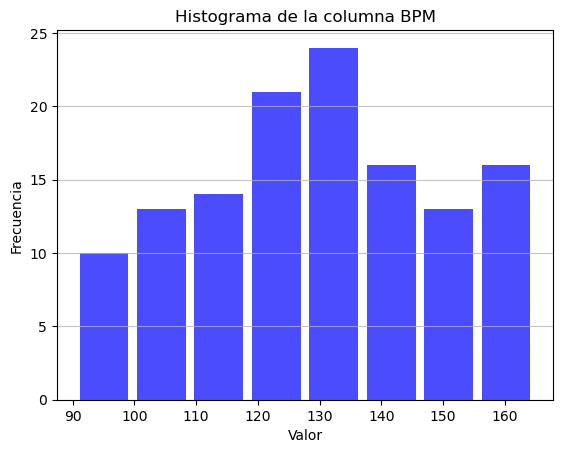

In [3]:
plt.hist(datos, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna ' + columna_seleccionada)
plt.show()

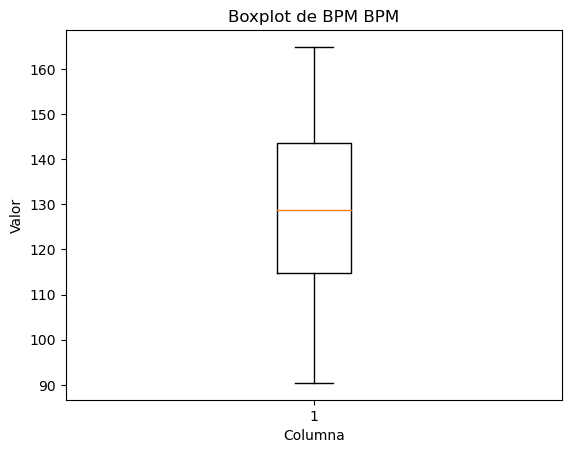

In [4]:
plt.boxplot(datos)
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.title('Boxplot de BPM ' + columna_seleccionada)
plt.show()

In [5]:
z_scores = zscore(datos)
grubbs_statistic = np.max(np.abs(z_scores))
n = len(datos)
critical_value = (n - 1) / np.sqrt(n) * np.sqrt((grubbs_statistic**2) / (n**2 + grubbs_statistic**2))
if grubbs_statistic > critical_value:
    print("El valor", datos[np.argmax(np.abs(z_scores))], "es un valor atípico según el Test de Grubbs.")
else:
    print("No se encontraron valores atípicos según el Test de Grubbs.")

El valor 90.43588132182266 es un valor atípico según el Test de Grubbs.


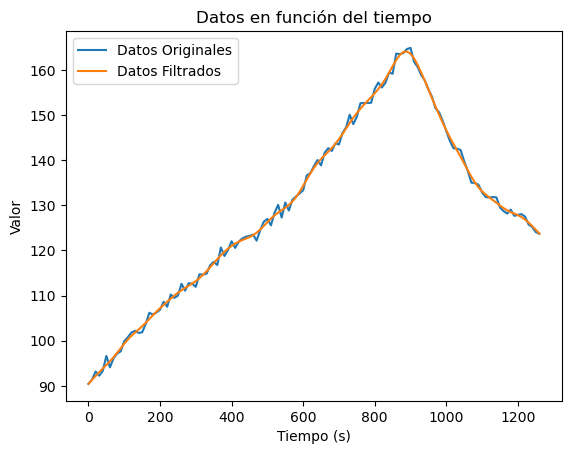

In [6]:
def butterworth_filter(data, cutoff_freq, fs, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Frecuencia de corte para el filtro Butterworth
cutoff_freq = 0.01 
fs = 0.1  # Frecuencia de muestreo

# Aplicar el filtro Butterworth
datos_filtrados = butterworth_filter(datos, cutoff_freq, fs)

# Graficar los datos originales y los datos filtrados en función del tiempo
plt.plot(df['Tiempo(s)'], datos, label='Datos Originales')
plt.plot(df['Tiempo(s)'], datos_filtrados, label='Datos Filtrados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor')
plt.title('Datos en función del tiempo')
plt.legend()
plt.show()

In [11]:
# Test 200 veces

def Test_ejecucion(selector):
    inicio = time.time()
    for i in range(200):
        if selector == 74:
            data_input = ''.join(str(random.randint(0,1)) for i in range(200))
            codex = hamming_74(data_input)
        elif selector == 1511:
            data_input = ''.join(str(random.randint(0,1)) for i in range(200))
            codex = hamming_1511(data_input)
        else:
            print("Codificacion no disponible")
            return
    final = time.time()
    ETA = final - inicio
    ETAs = ETA/200
    frec = 1/ETA
    frecs = 1/ETAs
    print("Tiempo de ejecucion total: ", ETA, "[s]")
    print("Tiempo promedio: ", ETAs, "[s]")
    print(frec, frecs)